In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [3]:
data=("D:\\stock price.csv")

In [5]:
df=pd.read_csv(data)


In [6]:
df.tail(20)


,Index,Date,Open,High,Low,Close,Adj Close,Volume
112437,N100,06-05-2021,1240.680054,1244.989990,1233.609985,1240.099976,1240.099976,205457300.0
112438,N100,07-05-2021,1246.810059,1248.199951,1239.030029,1248.140015,1248.140015,192110800.0
112439,N100,10-05-2021,1249.780029,1249.780029,1240.979980,1243.630005,1243.630005,189458000.0
112440,N100,11-05-2021,1227.839966,1229.510010,1211.229980,1219.760010,1219.760010,236611300.0
112441,N100,12-05-2021,1219.910034,1224.560059,1214.060059,1220.079956,1220.079956,222628500.0
112442,N100,13-05-2021,1205.849976,1223.609985,1195.640015,1220.459961,1220.459961,176327600.0
112443,N100,14-05-2021,1229.810059,1237.939941,1222.030029,1237.890015,1237.890015,181430800.0
112444,N100,17-05-2021,1241.099976,1242.670044,1231.630005,1234.689941,1234.689941,159643800.0
112445,N100,18-05-2021,1242.599976,1244.239990,1232.599976,1233.800049,1233.800049,175986500.0
112446,N100,19-05-2021,1221.420044,1223.380005,1202.780029,1215.270020,1215.270020,217219200.0


In [7]:
df.dtypes


Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [8]:
df.shape

(112457, 8)

In [9]:
df.columns


Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.isnull().any()

Index        False
Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [11]:
for col in df.columns:
    nbr_of_uniq_vals = df[col].nunique()
    print(f"\n\n{col} -> {nbr_of_uniq_vals}")
    print(df[col].value_counts(dropna=True).index)



Index -> 14
Index(['N225', 'NYA', 'IXIC', 'GSPTSE', 'HSI', 'GDAXI', 'SSMI', 'KS11', 'TWII',
       '000001.SS', '399001.SZ', 'N100', 'NSEI', 'J203.JO'],
      dtype='object')


Date -> 14731
Index(['03-11-2017', '04-11-2015', '16-11-2015', '13-11-2015', '10-11-2015',
       '09-11-2015', '06-11-2015', '05-11-2015', '02-11-2015', '16-12-2015',
       ...
       '23-06-1965', '22-06-1965', '21-06-1965', '18-06-1965', '17-06-1965',
       '16-06-1965', '15-06-1965', '14-06-1965', '11-06-1965', '03-06-2021'],
      dtype='object', length=14731)


Open -> 102021
Float64Index([3187.620117,  586.630005,  569.919983,  567.599976,   555.02002,
               589.059998,  570.659973,  594.559998,       586.0,       580.5,
              ...
               3235.22998, 3206.043945, 3237.922119, 3269.735107, 3277.808105,
              3277.188965, 3257.669922, 3269.318115, 3279.986084,  1258.48999],
             dtype='float64', length=102021)


High -> 102146
Float64Index([3187.620117,  569.91998

In [12]:
df.describe(include="all")


,Index,Date,Open,High,Low,Close,Adj Close,Volume
count,112457,112457,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
unique,14,14731,NaN,NaN,NaN,NaN,NaN,NaN
top,N225,03-11-2017,NaN,NaN,NaN,NaN,NaN,NaN
freq,14500,14,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,NaN,NaN,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,NaN,NaN,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,NaN,NaN,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,NaN,NaN,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,NaN,NaN,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08


In [13]:
print('Columns having all nulls - ',df.isnull().all(axis=0).sum())
print('Columns having at least one null - ', df.isnull().any(axis=0).sum())

Columns having all nulls -  0
Columns having at least one null -  6


In [14]:
for val in df['Index'].value_counts(dropna=False).index:
        col_df=df[df['Index']==val]
        print("For index =",val,":")
        for col in df.columns:
            #nbr_of_uniq_vals = df1[col].nunique()
            #print(f"\n\n{col} -> {nbr_of_uniq_vals}")
            #print(df1[col].value_counts(dropna=False).index)
            print("     ",col,":    ",col_df[col].isnull().sum())
        print()    

For index = N225 :
      Index :     0
      Date :     0
      Open :     626
      High :     626
      Low :     626
      Close :     626
      Adj Close :     626
      Volume :     626

For index = NYA :
      Index :     0
      Date :     0
      Open :     1
      High :     1
      Low :     1
      Close :     1
      Adj Close :     1
      Volume :     1

For index = IXIC :
      Index :     0
      Date :     0
      Open :     0
      High :     0
      Low :     0
      Close :     0
      Adj Close :     0
      Volume :     0

For index = GSPTSE :
      Index :     0
      Date :     0
      Open :     250
      High :     250
      Low :     250
      Close :     250
      Adj Close :     250
      Volume :     250

For index = HSI :
      Index :     0
      Date :     0
      Open :     258
      High :     258
      Low :     258
      Close :     258
      Adj Close :     258
      Volume :     258

For index = GDAXI :
      Index :     0
      Date :     0
     

N225         14500
NYA          13948
IXIC         12690
GSPTSE       10776
HSI           8750
GDAXI         8606
SSMI          7830
KS11          6181
TWII          6010
000001.SS     5963
399001.SZ     5928
N100          5507
NSEI          3381
J203.JO       2387
Name: Index, dtype: int64


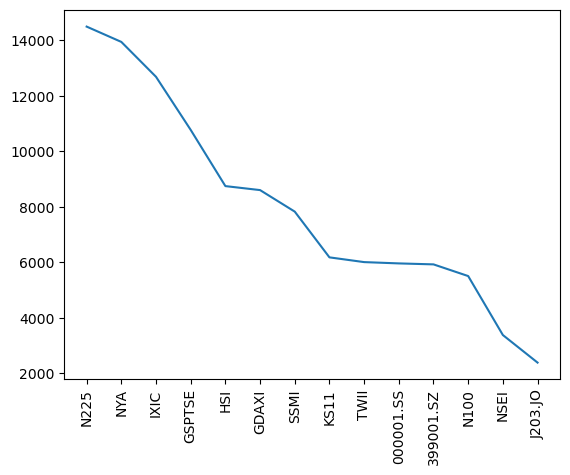

In [15]:
x=df['Index'].value_counts()
#y=df['Date'].unique()
x_axis=x.index
y_axis=x
print(y_axis)
plt.plot(x_axis, y_axis)
plt.xticks(rotation=90)
plt.show()

In [17]:
'''y_date=df['Date'].value_counts()
x_axis_date=y_date.index
y_axis_date=y_date
plt.plot(y_axis_date, x_axis_date)
plt.show()'''


"y_date=df['Date'].value_counts()\nx_axis_date=y_date.index\ny_axis_date=y_date\nplt.plot(y_axis_date, x_axis_date)\nplt.show()"

In [18]:
total_null = df.isnull().sum().sort_values(ascending = False)


In [19]:
total =  df.count().sort_values(ascending = False)
percentage = (df.isnull().mean()*100).sort_values(ascending = False)
missingData = pd.concat([total_null, total, percentage], axis=1, keys=['Total Null', 'Total', 'Percentage'])
missingData

,Total Null,Total,Percentage
Open,2204,110253,1.95986
High,2204,110253,1.95986
Low,2204,110253,1.95986
Close,2204,110253,1.95986
Adj Close,2204,110253,1.95986
Volume,2204,110253,1.95986
Index,0,112457,0.00000
Date,0,112457,0.00000


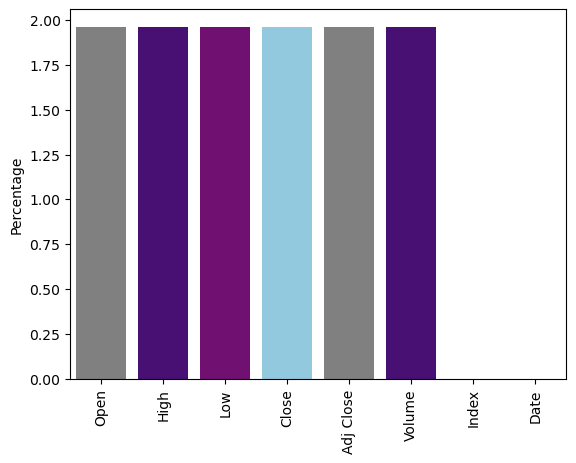

In [21]:
sns.barplot(x=missingData.index, y=missingData['Percentage'],palette=['grey','indigo','purple','skyblue'])
plt.xticks(rotation = 90)
plt.show()

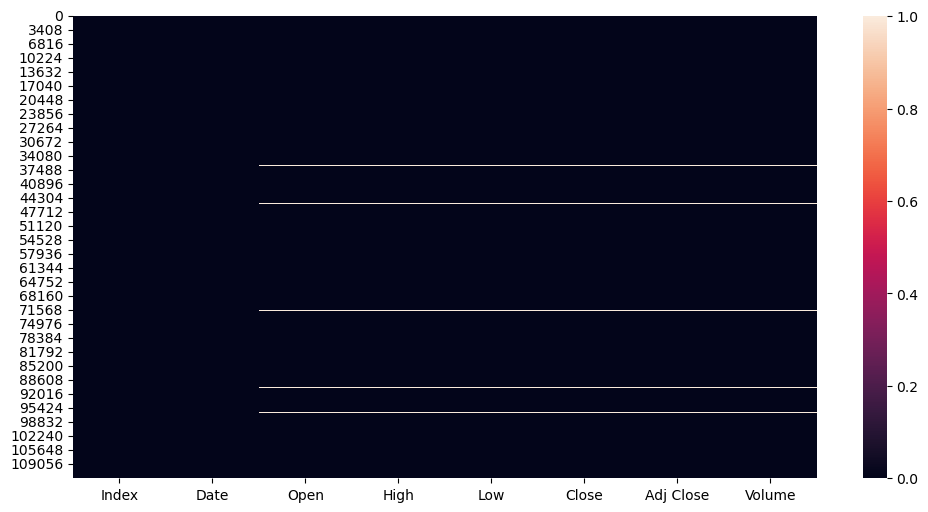

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

In [23]:
df.shape #to know original dimension of data
df.dropna(inplace = True)
df.shape #after dropping the rows


(110253, 8)